In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
# 데이터 주소 
dir = '/Users/chan/Documents/취업준비/2024 상반기/(불)롯데정보통신/(불)코테/2024년 AI기술팀 신입채용_문제①_데이터/20240222092757460.jpg'

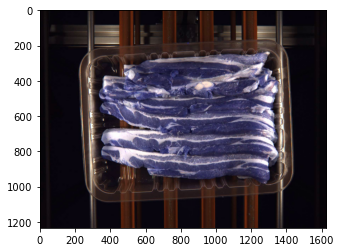

In [5]:
# 이미지 읽기
img = cv2.imread(dir)

# 이미지 시각화 결과 BGR 순으로 나오기 때문에 삼겹살 색이 제대로 안나올 수 있음
plt.imshow(img)

In [6]:
# 모서리 위치 파악
# (0, 0, 1624, 1234)
rc = (200, 200, 1424, 1034)

In [7]:
# grabcut을 위한 mask 생성(원본 이미지와 동일한 사이즈)
mask  = np.zeros(img.shape[:2], np.uint8)
print(f'mask size = {mask.shape}')

mask size = (1234, 1624)


In [8]:
cv2.grabCut(img, mask, rc, None, None, 15, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2],
        [0, 0, 0, ..., 2, 2, 2]], dtype=uint8),
 array([[3.84806572e-01, 1.22757124e-01, 1.45082473e-01, 1.80116543e-01,
         1.67237288e-01, 7.02299562e+00, 4.49817547e+00, 1.23102258e+01,
         1.07840414e+02, 9.15157806e+01, 8.20547105e+01, 6.03054900e+01,
         2.92034082e+01, 1.79124785e+01, 1.47001120e+01, 9.63395728e+00,
         1.45380410e+01, 4.79479688e+01, 3.52475419e+01, 3.40794461e+01,
         1.35729262e+00, 9.50399789e-01, 1.94263185e+00, 9.50399789e-01,
         1.28807078e+00, 4.58893298e-01, 1.94263185e+00, 4.58893298e-01,
         4.17823969e+00, 2.36623998e+03, 2.11875764e+03, 1.60482422e+03,
         2.11875764e+03, 2.02130010e+03, 1.60108607e+03, 1.60482422e+03,
         1.60108607e+03, 1.42191448e+03, 4.61531941e+02, 1.75490770e+02,
         6.07887913e+01, 1.75490770e+02, 9.5

In [9]:
# grabCut 자료에서 0,2는 배경, 1,3은 전경입니다.
# mask == 0 or mask == 2를 만족하면 0으로 설정 아니면 1로 설정합니다
mask2 = np.where((mask == 0) | (mask == 2), 0, 1).astype(np.uint8)
segmentation = img*mask2[:,:,np.newaxis]

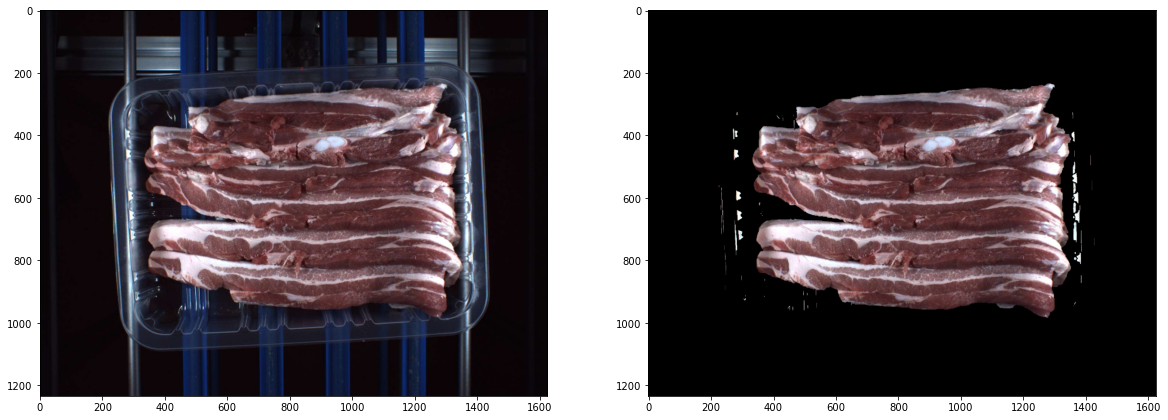

In [10]:
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2,)
plt.imshow(cv2.cvtColor(segmentation, cv2.COLOR_BGR2RGB))

In [11]:
segmentation1 = segmentation.reshape(segmentation.shape[0] * segmentation.shape[1], -1)

In [12]:
kmeans = KMeans(3, random_state=0).fit(segmentation1)

In [13]:
cluster_mask = kmeans.labels_.reshape((segmentation.shape[0], segmentation.shape[1]))

In [14]:
cluster1 = np.where(cluster_mask == 0, 1 , 0).astype(np.uint8)
cluster2 = np.where(cluster_mask == 2, 1 , 0).astype(np.uint8)

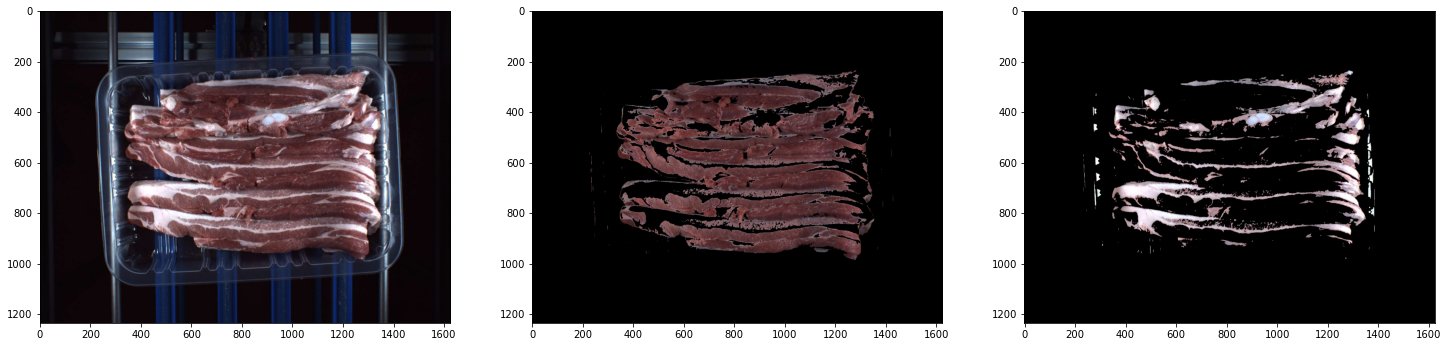

In [23]:
plt.figure(figsize=(25,25))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
segmentation1 = img*cluster1[:,:,np.newaxis]
plt.imshow(cv2.cvtColor(segmentation1, cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
segmentation2 = img*cluster2[:,:,np.newaxis]
plt.imshow(cv2.cvtColor(segmentation2, cv2.COLOR_BGR2RGB))